## For a given dataset predict number of bikes getting shared based on different parameters 

### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *

# importing dataset & storing it as pandas dataframe
bike_data = pd.read_csv('bike_sharing.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Feature selection & outlier removal 

In [2]:
# All the steps of data feature column selection & removing outliers
# are done while using multi-linear model you can check all steps there
bike_data.drop(['instant','dteday','holiday','atemp','casual','registered'], axis=1, inplace=True)
bike_data = remove_outliers(bike_data, ['cnt'])

In [3]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [4]:
# feature columns
# taking continuous numerical variable columns  or two category categorical columns
numerical_cols = ['temp','hum','windspeed','yr','workingday']
# at least 3 categoried columns 
categorical_cols = ['season','mnth','hr','weekday','weathersit']

# target column
target = 'cnt'

In [5]:
bike_data.shape

(16874, 11)

#### Plotting label data-points 

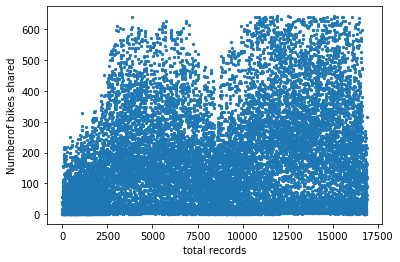

In [6]:
plt.scatter(np.arange(0,16874),bike_data['cnt'], label='data points',s=5)
plt.xlabel('total records')
plt.ylabel('Numberof bikes shared')
plt.show()

#### Separating out feature & label columns

In [7]:
x_values, y_values, one_hot_encode = data_col_transformation_regression(bike_data, numerical_cols, categorical_cols, target)

In [8]:
x_values.shape

(16874, 56)

#### Splitting dataset into train set & test set

In [9]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.8, random_state=10) 

### Buliding Decision Tree Regression model

In [10]:
regressor = DecisionTreeRegressor()      
regressor.fit(train_x_values, train_y_values)       

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Plotting model against label data-points

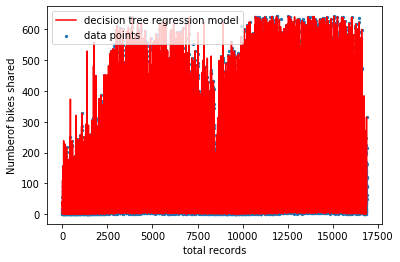

In [11]:
predictions = regressor.predict(x_values)
plt.scatter(np.arange(0,16874),bike_data['cnt'], label='data points',s=5)
plt.plot(np.arange(0,16874), np.where(predictions >0, predictions,0),label='decision tree regression model', c='red')
plt.xlabel('total records')
plt.ylabel('Numberof bikes shared')
plt.legend()
plt.show()

#### Storing predictions for test set

In [12]:
test_prediction = regressor.predict(test_x_values)

### Calculating errors

In [13]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

38.90014814814815

In [14]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

4152.538074074074

In [15]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

64.44018989787409

### Evaluating model against test set

In [16]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.8320251382041801
